In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
fraud_data = pd.read_csv("/content/drive/My Drive/### ELEVES ###/Lionel CHAUMIEN/S4/Projet S4/Fraud_Data3.csv")

In [6]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,fraud,country,continent,diff_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,Asia,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,North America,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,North America,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,Unknown,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,North America,4361461.0


In [7]:
fraud_data.isnull().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
fraud             False
country           False
continent         False
diff_time         False
dtype: bool

In [0]:
target = fraud_data.pop("fraud")
fraud_data["fraud"] = target
fraud_data.head()

In [9]:
fraud_data.fraud.value_counts()

0    136961
1     14151
Name: fraud, dtype: int64

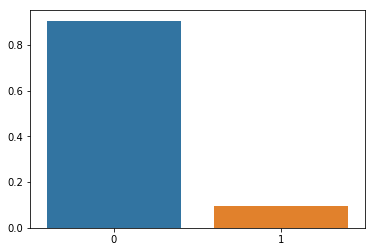

In [10]:
n = fraud_data.fraud.count()
sns.barplot([0, 1], [fraud_data.fraud.value_counts()[0]/n, fraud_data.fraud.value_counts()[1]/n])

In [0]:
#sns.lmplot("diff_time", "fraud", data = fraud_data, logistic = True)

- enlever user id
- transformer dates en mois-années
- liste des devices id frauduleux 

### Preprocessing

In [0]:
data = fraud_data.iloc[:, 3:]

In [0]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 42)

### Fraud devices

In [0]:
data_train_f1 = data_train[data_train.fraud == 1]
data_train_f0 = data_train[data_train.fraud == 0]

In [0]:
# Liste des device_id qui ont fraudé au moins 1 fois
fraud_devices = list(data_train_f1.groupby("device_id").sum().index)

In [0]:
# Liste des device_id qui n'ont jamais fraudé
never_fraud_devices = [id for id in data_train.device_id if id not in fraud_devices]

In [0]:
# Liste des device_id qui ont au moins pas fraudé 1 fois
no_fraud_devices = [id for id in data_train_f0.device_id]

In [18]:
data_train["suspect"] = data_train.device_id.apply(lambda x: 0 if x not in fraud_devices 
                                                                else 1 if ((x in fraud_devices) & (x in no_fraud_devices)) 
                                                                else 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
data_train.suspect.value_counts()

0    107684
1      7997
2      5208
Name: suspect, dtype: int64

In [20]:
data_test["suspect"] = data_test.device_id.apply(lambda x: 0 if x not in fraud_devices 
                                                                else 1 if ((x in fraud_devices) & (x in no_fraud_devices)) 
                                                                else 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
ip_address_train = data_train.pop("ip_address")
ip_address_test = data_test.pop("ip_address")

In [0]:
device_id_train = data_train.pop("device_id")
device_id_test = data_test.pop("device_id")


In [0]:
y_train = data_train.pop("fraud")
y_test = data_test.pop("fraud")

In [0]:
X_train = data_train
X_test = data_test

### Random Forest

In [0]:
X = pd.concat([X_train, X_test])

In [41]:
X.head()

,purchase_value,age,diff_time,suspect,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bermuda,country_Bhutan,country_Bolivia,country_Bonaire; Sint Eustatius; Saba,country_Bosnia and Herzegowina,country_Botswana,country_Brazil,country_British Indian Ocean Territory,...,country_Slovakia (SLOVAK Republic),country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Taiwan; Republic of China (ROC),country_Tajikistan,country_Tanzania United Republic of,country_Thailand,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,continent_Unknown
119187,39,32,9073047.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
133622,31,37,1507163.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
103404,10,44,6123947.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
55079,45,29,31566.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
98816,26,19,7761484.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**CHI2**

In [0]:
from sklearn.feature_selection import chi2

In [0]:
y = target

In [0]:
y.head()

In [0]:
X = Fraud_

In [0]:
chi2 = chi2(X,y)
chi2

In [0]:
df_selec = pd.DataFrame(chi2,
				   index=["chi2-score","p-value"], columns = df.drop("converted", axis = 1).columns)
df_selec = df_selec.T.sort_values(by="chi2-score",ascending = False)

In [0]:
df_selec

In [0]:
X = pd.get_dummies(X)

In [28]:
X.shape

(151112, 203)

In [0]:
X_train2 = X.loc[X_train.index, : ]
X_test2 = X.loc[X_test.index, : ]

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(20)
rf.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
rf.score(X_test2, y_test)

0.9459021275187771

In [32]:
rf.score(X_train2, y_train)

0.9998097428219276

### XGBOOST

In [33]:
from xgboost import XGBClassifier
regressor_xgb = XGBClassifier()
regressor_xgb.fit(X_train2, y_train)
regressor_xgb.score(X_test2, y_test)

0.9458690401349965

## GridSearchCV Random Forest

In [0]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params = {'n_estimators' : [1, 5, 10, 20, 30, 40, 50],
        'max_depth' : np.arange(1, 10),
        'min_samples_split' : np.arange(2, 10)}


grid = GridSearchCV(rf, param_grid = params)

grid.fit(X_train2, y_train)
grid.best_params_

In [0]:
grid.best_estimator_.score(X_test2, y_test)

In [0]:
y_pred = grid.best_estimator_.predict(X_test2)

### Confusion matrix

In [0]:
y_pred_xgboost = regressor_xgb.predict(X_test2)

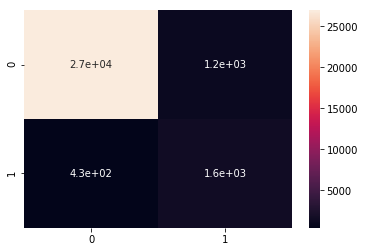

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_xgboost, y_test)
sns.heatmap(cm, annot = True)

Plutot bien car 0 faux-positifs, ie 0 observations prédites comme non-fraude alors que c'était de la fraude.

In [0]:
X_test2.columns

Index(['purchase_value', 'age', 'diff_time', 'suspect', 'source_Ads',
       'source_Direct', 'source_SEO', 'browser_Chrome', 'browser_FireFox',
       'browser_IE',
       ...
       'country_Yemen', 'country_Zambia', 'country_Zimbabwe',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'continent_Unknown'],
      dtype='object', length=203)

In [0]:
ypred[128421]

KeyError: ignored

In [0]:
ypred = pd.DataFrame(y_pred_xgboost, index = X_test2.index)
ypred.loc[[50746]]

,0
50746,0


In [0]:
y_pred_xgboost = pd.DataFrame(y_pred_xgboost, index = X_test2.index, columns = ['fraud'])

In [0]:
y_test = pd.DataFrame(y_test, index = X_test2.index)

In [0]:
y_pred_xgboost.columns

Index(['fraud'], dtype='object')

In [0]:
y_test.columns

Index(['fraud'], dtype='object')

In [0]:
y_diff = [y_test.loc[[i]] - y_pred_xgboost.loc[[i]] for i in y_test.index]

In [0]:
y_diff

[       fraud
 92865    NaN,        fraud
 50746    NaN,         fraud
 128421    NaN,         fraud
 146243    NaN,        fraud
 44524    NaN,        fraud
 39098    NaN,        fraud
 31671    NaN,         fraud
 124945    NaN,         fraud
 111933    NaN,     fraud
 89    NaN,       fraud
 5761    NaN,        fraud
 24409    NaN,        fraud
 81243    NaN,        fraud
 10816    NaN,        fraud
 70804    NaN,        fraud
 58255    NaN,         fraud
 119872    NaN,        fraud
 68671    NaN,         fraud
 123326    NaN,      fraud
 378    NaN,       fraud
 8138    NaN,         fraud
 125807    NaN,         fraud
 141198    NaN,        fraud
 85516    NaN,        fraud
 46227    NaN,         fraud
 138831    NaN,        fraud
 95142    NaN,        fraud
 73473    NaN,         fraud
 119150    NaN,         fraud
 148759    NaN,         fraud
 112003    NaN,         fraud
 121696    NaN,        fraud
 96206    NaN,        fraud
 20670    NaN,        fraud
 99776    NaN,        

In [0]:
[index for index in y_test.index if y_test.loc[[index]] == 1]

ValueError: ignored

In [0]:
liste_indices_1_y_test = [index for index in y_test.index if y_test.loc[[index]] == 1]


liste_indices_misclass0 = [index for index in y_pred_xgboost.index if ((y_pred_xgboost.loc[[index]] == 0) & (index in liste_indices_1_y_test))]


ValueError: ignored

In [0]:
misclass0 = [X_test2.purchase_value[i] for i in liste_indices_misclass0]

In [0]:
liste_indices_1_y_pred = 
amout_detected_fraud = 

In [0]:
amount_fraud = pd.DataFrame(misclass0).sum()[0]

In [0]:
amout_purchase = X_test2.purchase_value.sum()

In [0]:
amount_fraud*100/amout_purchase

1.8513848818374754

Sur 1 million $ de transactions, 20 000$ sont des fraudes non repérées (soit 1,85%) et ___ sont des fraudes détectées et non autorisées. 

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_xgboost)

0.7800950802461896

### BOOSTING

In [0]:
from sklearn.ensemble import AdaBoostClassifier
rf_boost = RandomForestClassifier()
ada = AdaBoostClassifier(rf_boost)

In [0]:
ada.fit(X_train2, y_train)

In [0]:
ada.score(X_test2, y_test)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
rf_xgboost = RandomForestClassifier()

xgboost = GradientBoostingClassifier(rf_xgboost)


In [0]:
xgboost.fit(X_train2, y_train)